dataset: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/global-data-on-sustainable-energy.csv'
energy1 = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#data cleaning
energy = energy1.dropna()

def convert_to_float(value):
    if isinstance(value, (float, int)):
        return value
    try:
        return float(value.replace(',', ''))
    except ValueError:
        return value

#turn all the column values to float datatype
for col in energy.columns:
    energy[col] = energy[col].apply(convert_to_float)

X = energy.drop('Entity', axis=1)
y = energy['Entity']

<ipython-input-26-4a5c5510d607>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy[col] = energy[col].apply(convert_to_float)


In [ ]:
#Decision Tree Classifier without hyperparameter tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

initial_tree_classifier = DecisionTreeClassifier(random_state=42)

initial_tree_classifier.fit(X_train, y_train)

y_pred_initial = initial_tree_classifier.predict(X_test)

#evaluate the initial model's performance
accuracy_initial = accuracy_score(y_test, y_pred_initial)
classification_rep_initial = classification_report(y_test, y_pred_initial)
conf_matrix_initial = confusion_matrix(y_test, y_pred_initial)

print("Initial Model - Accuracy:", accuracy_initial)
print("Initial Model - Classification Report:\n", classification_rep_initial)
print("Initial Model - Confusion Matrix:\n", conf_matrix_initial)

Initial Model - Accuracy: 1.0
Initial Model - Classification Report:
               precision    recall  f1-score   support

     Algeria       1.00      1.00      1.00         3
   Argentina       1.00      1.00      1.00         3
  Azerbaijan       1.00      1.00      1.00         2
  Bangladesh       1.00      1.00      1.00         4
      Brazil       1.00      1.00      1.00         8
       China       1.00      1.00      1.00         2
    Colombia       1.00      1.00      1.00         8
     Ecuador       1.00      1.00      1.00         2
       India       1.00      1.00      1.00         5
      Mexico       1.00      1.00      1.00         6
     Morocco       1.00      1.00      1.00         3
    Pakistan       1.00      1.00      1.00         2
        Peru       1.00      1.00      1.00         4
 Philippines       1.00      1.00      1.00         4
South Africa       1.00      1.00      1.00         4
   Sri Lanka       1.00      1.00      1.00         3
    Thailan

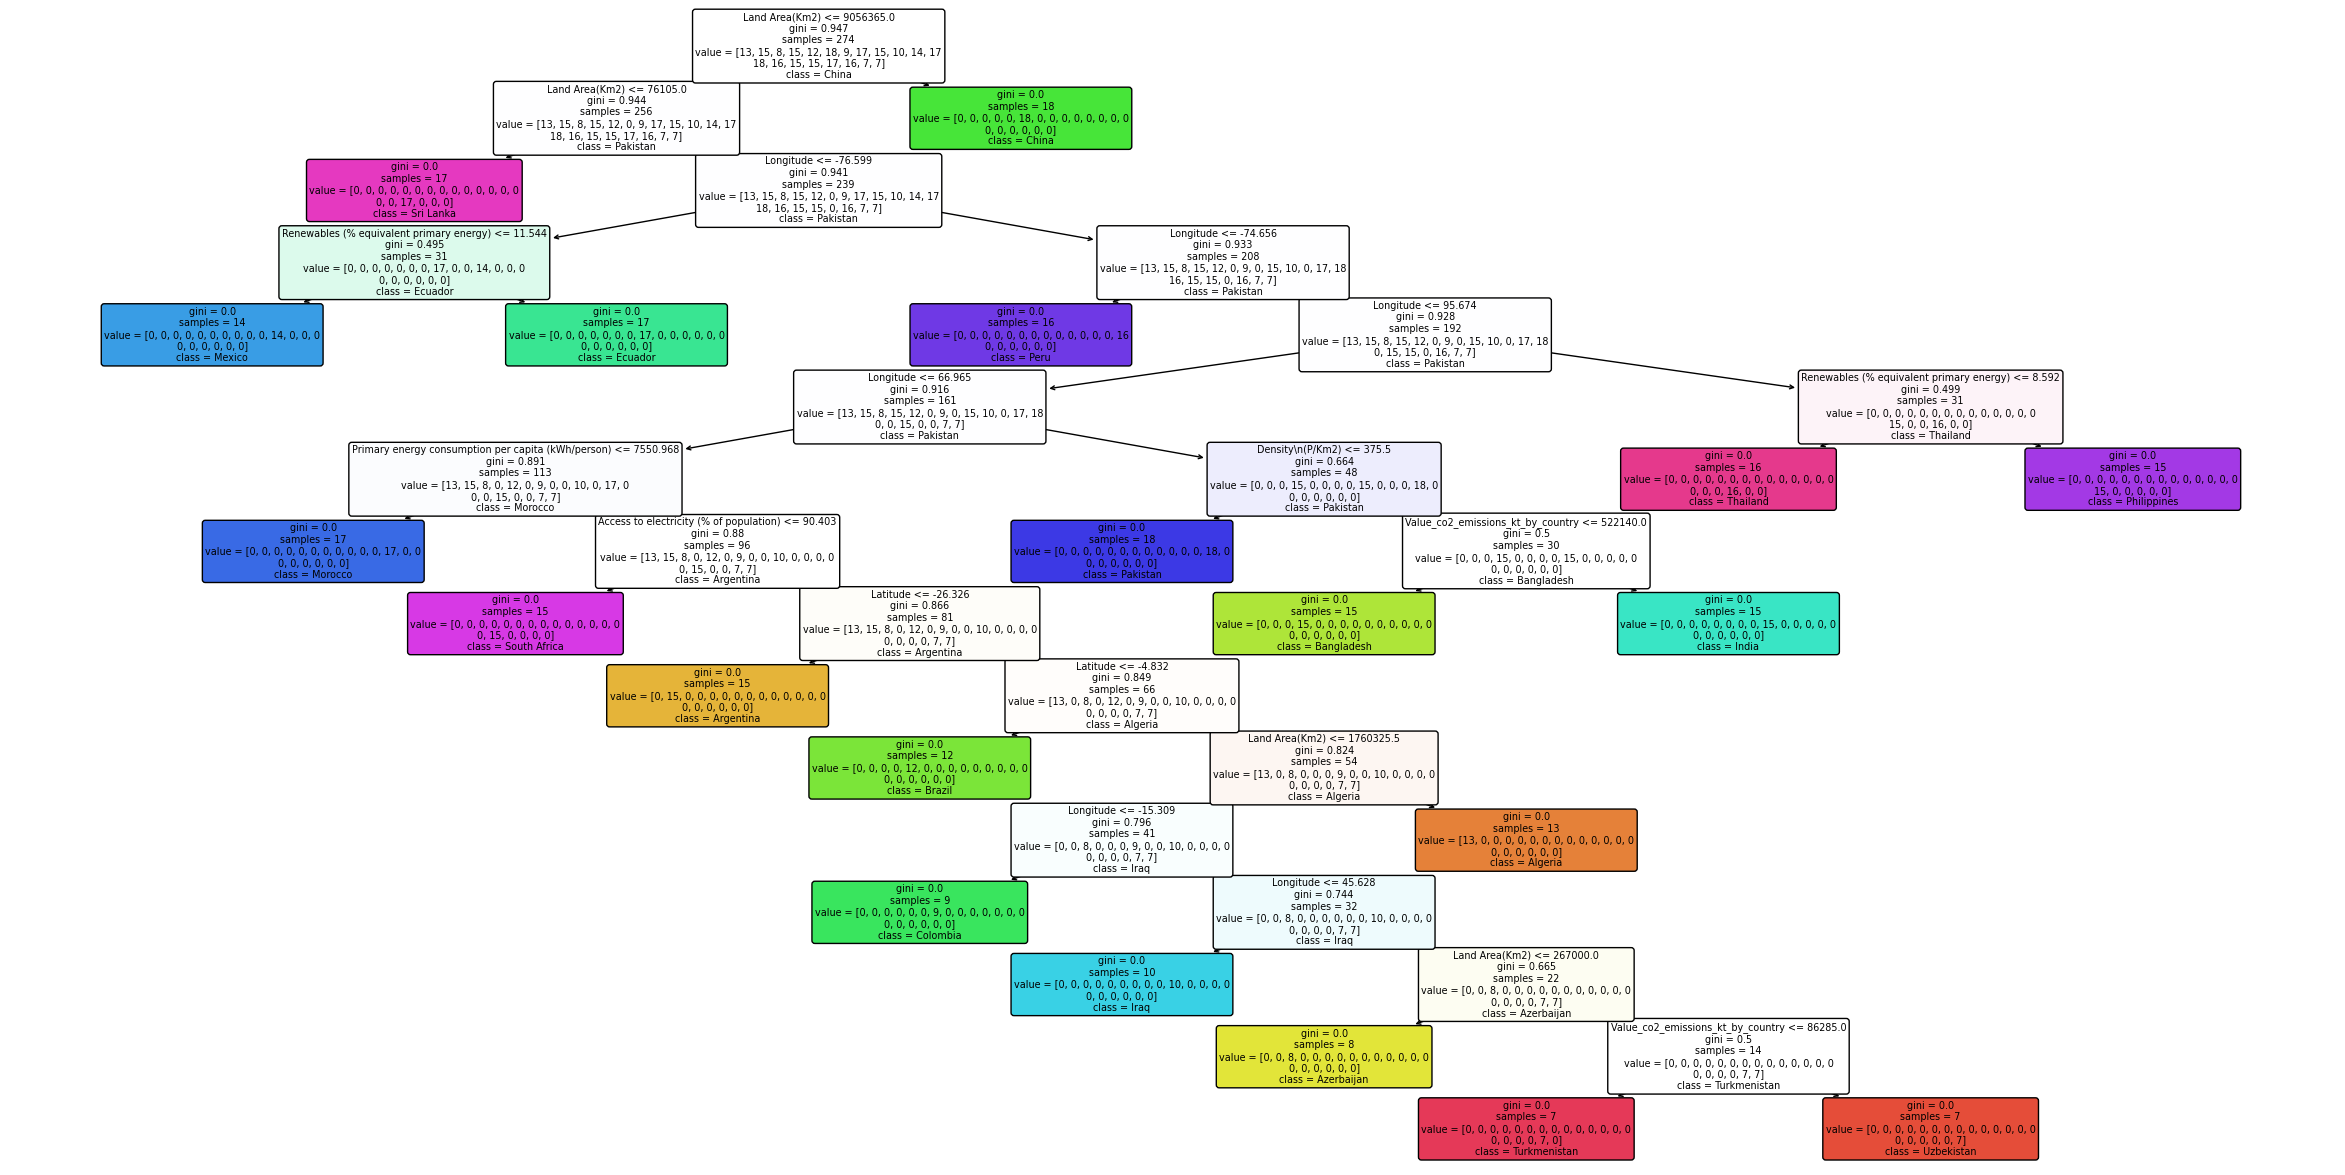

In [ ]:
plt.figure(figsize=(30, 15))
plot_tree(initial_tree_classifier, feature_names=X.columns, class_names=energy['Entity'].unique(), filled=True, rounded=True)
plt.show()

In [ ]:
#Decision Tree Classifier with hyperparameter tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)

#define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_tree_classifier = DecisionTreeClassifier(**best_params, random_state=42)

best_tree_classifier.fit(X_train, y_train)

y_pred = best_tree_classifier.predict(X_test)

#evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Tuned Model - Accuracy:", accuracy)
print("Tuned Model - Classification Report:\n", classification_rep)
print("Tuned Model - Confusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model - Accuracy: 1.0
Tuned Model - Classification Report:
               precision    recall  f1-score   support

     Algeria       1.00      1.00      1.00         3
   Argentina       1.00      1.00      1.00         3
  Azerbaijan       1.00      1.00      1.00         2
  Bangladesh       1.00      1.00      1.00         4
      Brazil       1.00      1.00      1.00         8
       China       1.00      1.00      1.00         2
    Colombia       1.00      1.00      1.00         8
     Ecuador       1.00      1.00      1.00         2
       India       1.00      1.00      1.00         5
      Mexico       1.00      1.00      1.00         6
     Morocco       1.00      1.00      1.00         3
    Pakistan       1.00      1.00      1.00         2
        Peru       1.00      1.00      1.00         4
 Philippines       1.00      1.00      1.00         4
South Africa 

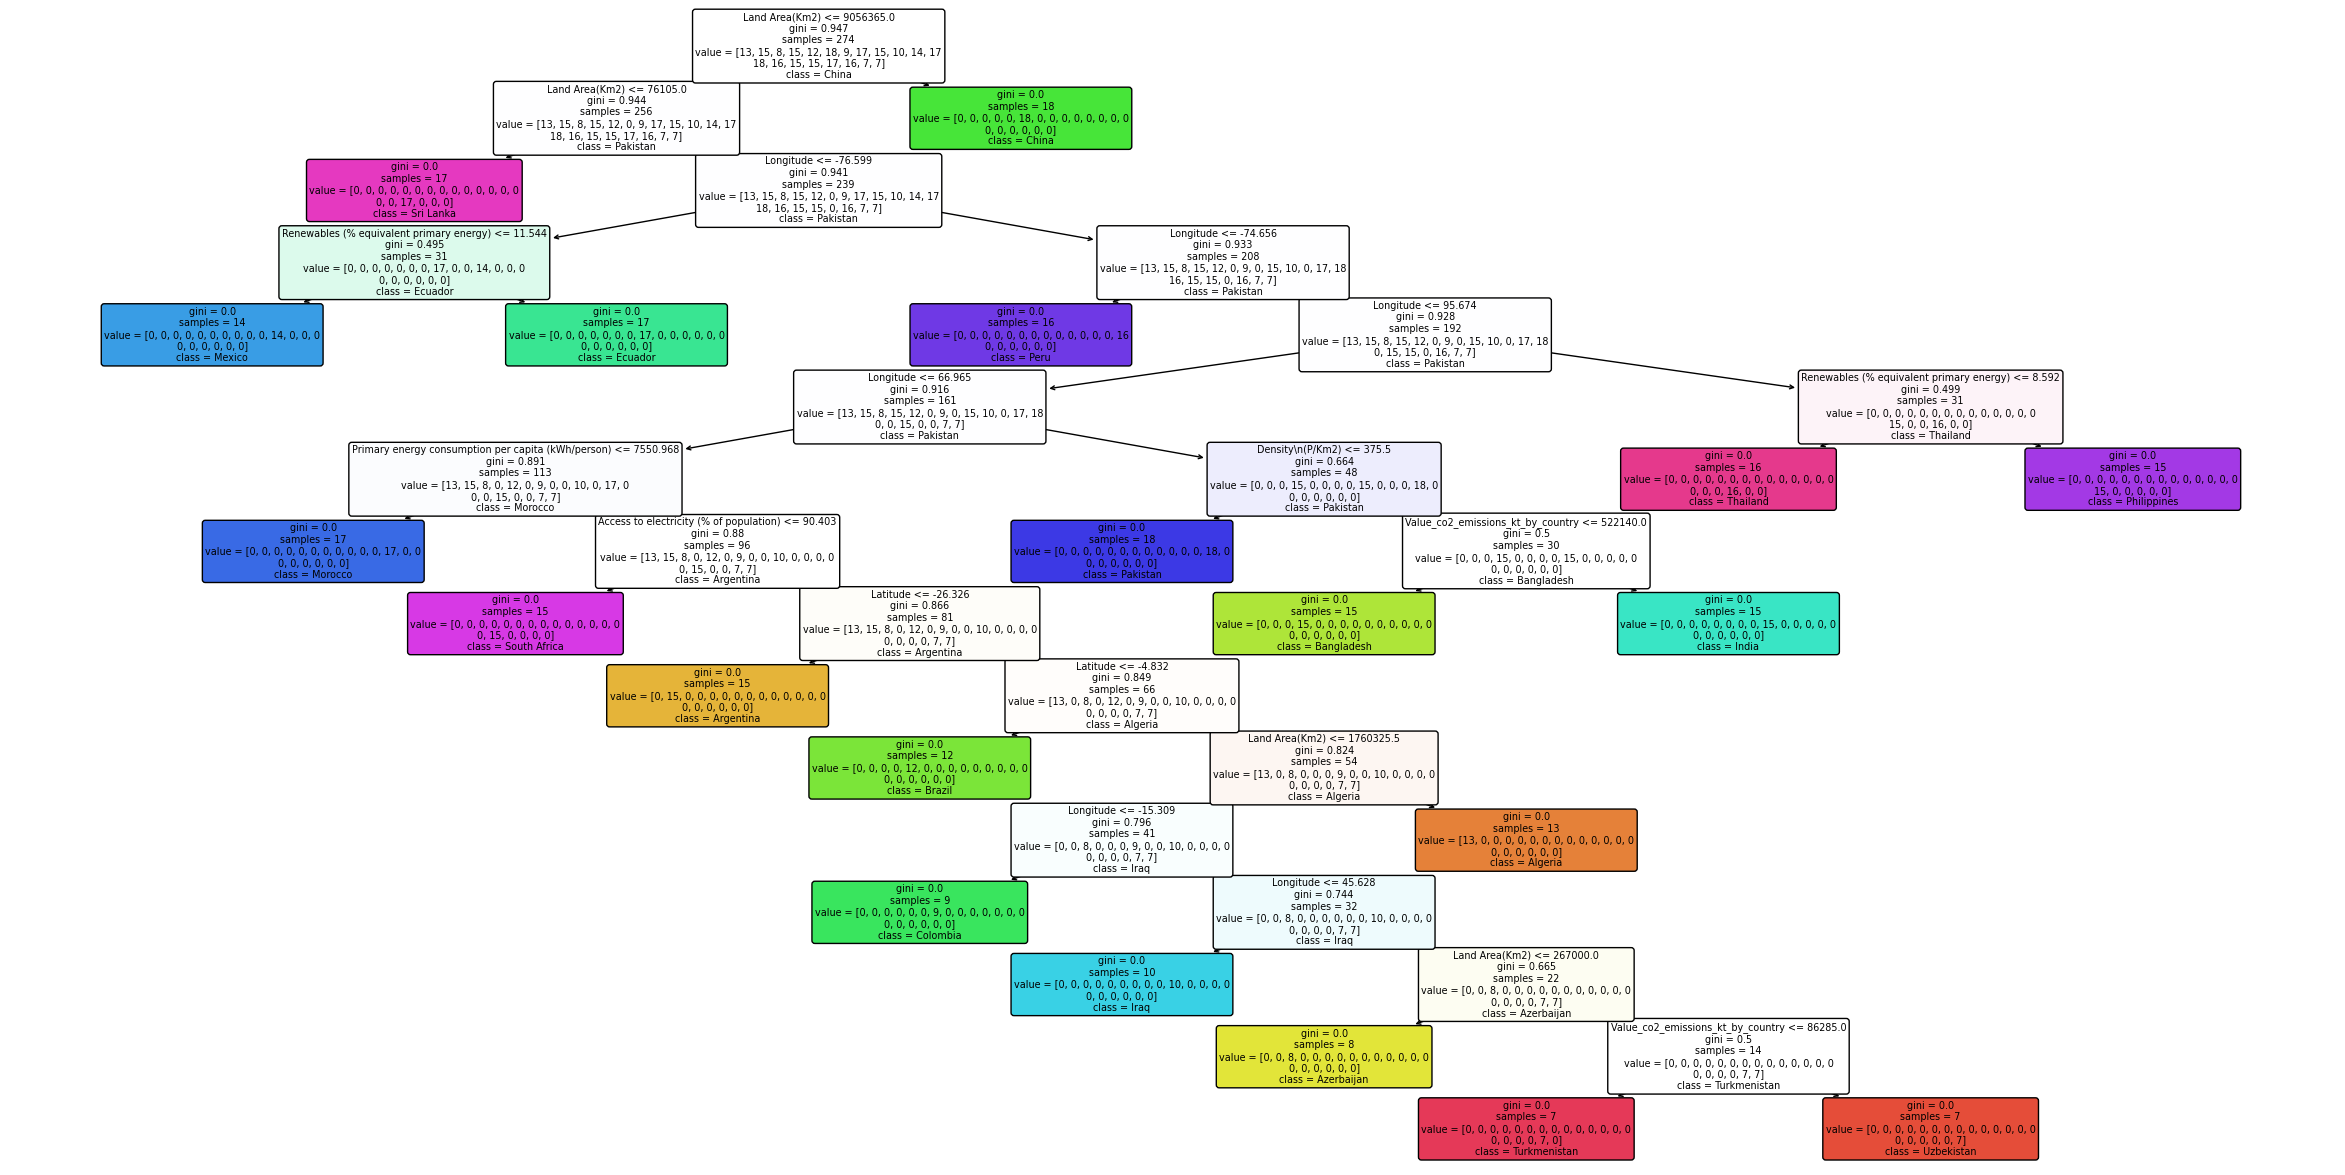

In [ ]:
#decision tree of the tuned model
plt.figure(figsize=(30, 15))
plot_tree(best_tree_classifier, feature_names=X.columns, class_names=energy['Entity'].unique(), filled=True, rounded=True)
plt.show()